<a href="https://colab.research.google.com/github/Sanskruti2214/Digit_Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras


In [2]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.iloc[9] # row access
# size

label       3
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 9, Length: 785, dtype: int64

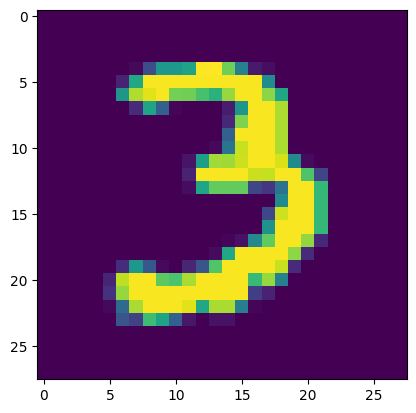

In [5]:
#df.iloc[row,column]
pixel_values=df.iloc[9,1:].values
img=pixel_values.reshape(28,28)
plt.imshow(img)

In [6]:
X=df.iloc[:,1:]
y=df['label']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train=X_train/255.0
X_test=X_test/255.0

In [9]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [10]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [16]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1), padding='same',activation='relu',input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1), padding='same',activation='relu',input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1, 1), padding='valid',activation='relu',input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 32)         

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(X_train,y_train,epochs=25,batch_size=512,verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
66/66 [==============================] - 63s 942ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0578 - val_accuracy: 0.9885
Epoch 2/25
66/66 [==============================] - 32s 489ms/step - loss: 9.3395e-04 - accuracy: 0.9997 - val_loss: 0.0532 - val_accuracy: 0.9893
Epoch 3/25
66/66 [==============================] - 32s 483ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0564 - val_accuracy: 0.9887
Epoch 4/25
66/66 [==============================] - 33s 507ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0570 - val_accuracy: 0.9874
Epoch 5/25
66/66 [==============================] - 34s 517ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0601 - val_accuracy: 0.9870
Epoch 6/25
66/66 [==============================] - 34s 517ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0678 - val_accuracy: 0.9871
Epoch 7/25
66/66 [==============================] - 34s 519ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0549 - val_accuracy: 0.

# Evaluating Model



In [38]:
y_prob=model.predict(X_test)

263/263 [==============================] - 2s 9ms/step


In [39]:
y_pred=y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9901190476190476

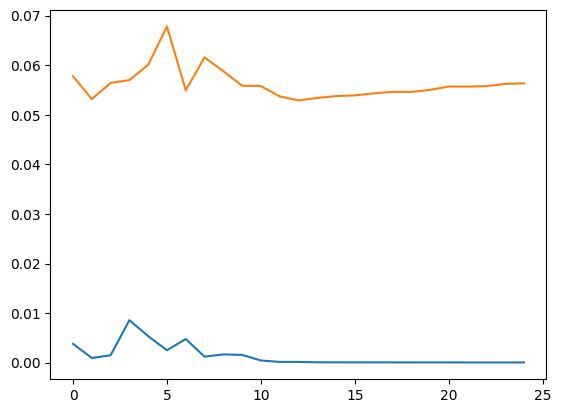

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

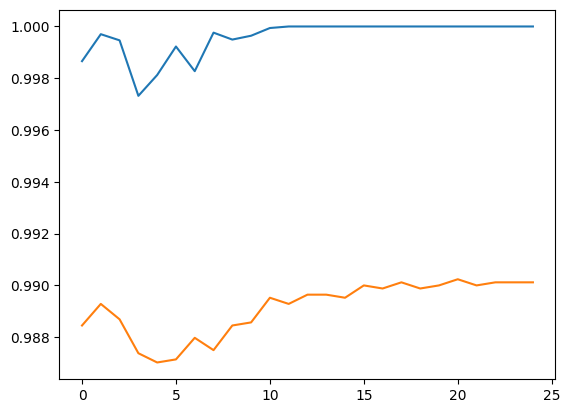

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

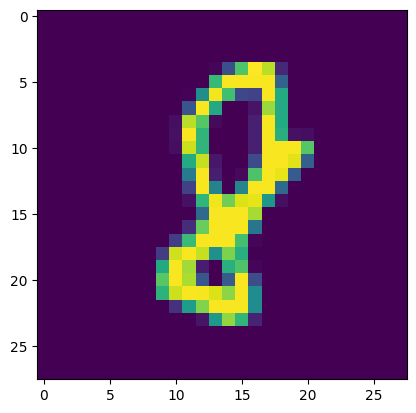

In [43]:
plt.imshow(X_test[0])

In [49]:
input_data = np.expand_dims(X_test[0], axis=0)

In [50]:
model.predict(input_data).argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([8])

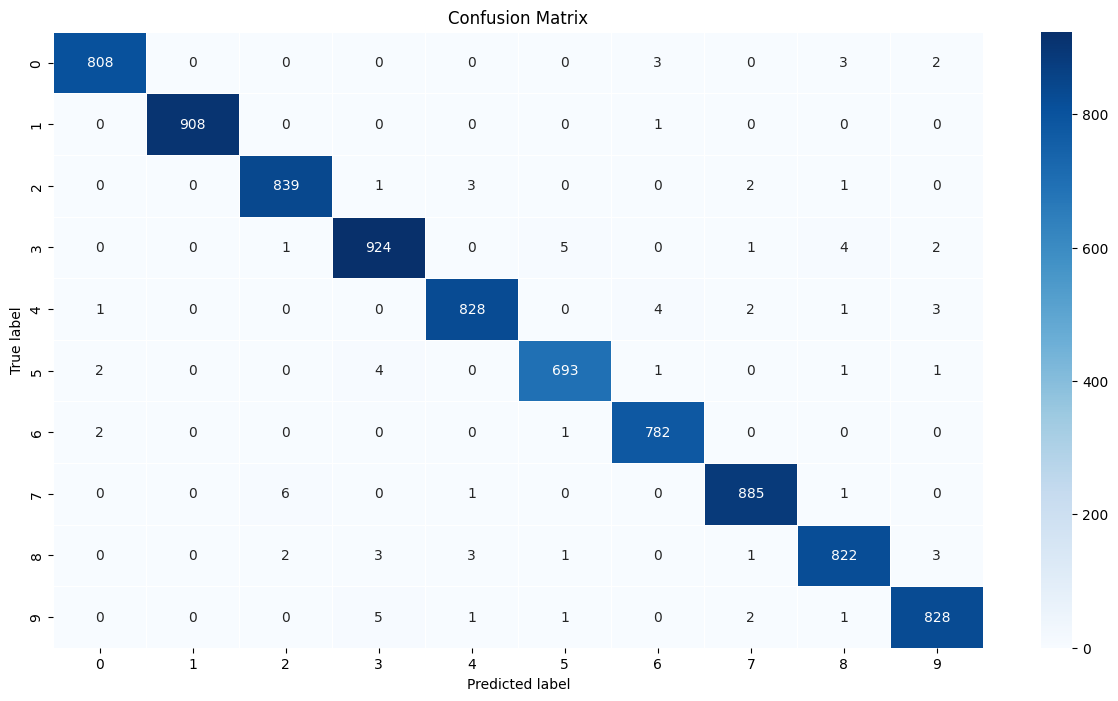

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [57]:
class_report = classification_report(y_test, y_pred)

In [58]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       1.00      1.00      1.00       909
           2       0.99      0.99      0.99       846
           3       0.99      0.99      0.99       937
           4       0.99      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      1.00      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.98      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [59]:
df_new=pd.read_csv('/content/drive/MyDrive/test.csv')

In [60]:
df_new.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_new=df_new/255.0

In [62]:
df_new=df_new.to_numpy()

In [63]:
df_new[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
df_new=df_new.reshape(-1,28,28,1)
y_test_predict=model.predict(df_new)

875/875 [==============================] - 14s 16ms/step


In [73]:
label=y_test_predict.argmax(axis=1)


In [76]:
df_predictions = pd.DataFrame({'ImageID': range(1, len(label) + 1),'label': label})
df_predictions.to_csv('/content/drive/MyDrive/solution.csv', index=False)

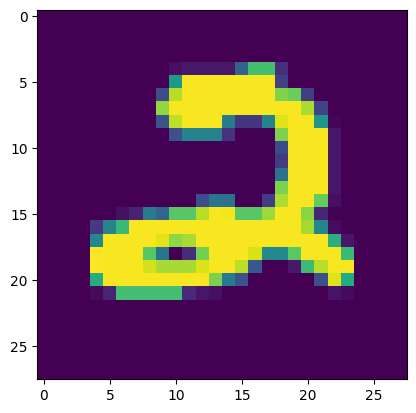

In [79]:
plt.imshow(df_new[0])

In [80]:
print(label)

[2 0 9 ... 3 9 2]
